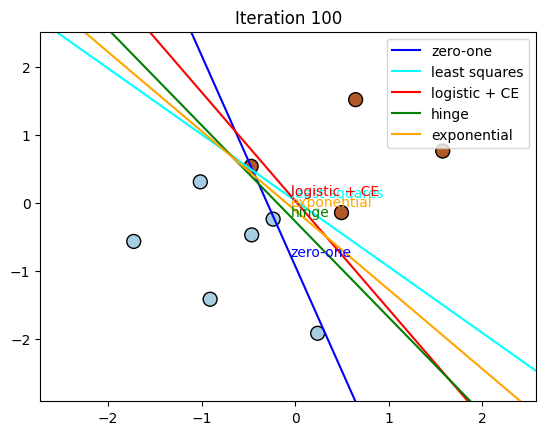

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Generate 2D synthetic data (10 points, binary classification)
np.random.seed(42)
X = np.random.randn(10, 2)  # 10 data points, 2 features
y = 2 * (X[:, 0] + X[:, 1] > 0) - 1  # Labels based on linear separability

# Parameters
learning_rate = 0.1
n_iterations = 100

# Initialize weights and bias (same for all models)
initial_w = np.random.randn(2)
initial_b = 0

# Loss functions
def zero_one_loss(z):
    return (z < 0).astype(float)

def least_squares_loss(z):
    return (1 - z)**2

def logistic_loss(z):
    return np.log(1 + np.exp(-z))

def hinge_loss(z):
    return np.maximum(0, 1 - z)

def exponential_loss(z):
    return np.exp(-z)

# Gradient of each loss function
def gradient_zero_one(w, b, X, y):
    z = y * (np.dot(X, w) + b)
    grad_w = -np.mean((z < 0)[:, None] * y[:, None] * X, axis=0)
    grad_b = -np.mean((z < 0) * y)
    return grad_w, grad_b

def gradient_least_squares(w, b, X, y):
    z = y * (np.dot(X, w) + b)
    grad_w = -2 * np.mean((1 - z)[:, None] * y[:, None] * X, axis=0)
    grad_b = -2 * np.mean((1 - z) * y)
    return grad_w, grad_b

def gradient_logistic(w, b, X, y):
    z = y * (np.dot(X, w) + b)
    grad_w = -np.mean((1 / (1 + np.exp(z)))[:, None] * y[:, None] * X, axis=0)
    grad_b = -np.mean((1 / (1 + np.exp(z))) * y)
    return grad_w, grad_b

def gradient_hinge(w, b, X, y):
    z = y * (np.dot(X, w) + b)
    grad_w = -np.mean((z < 1)[:, None] * y[:, None] * X, axis=0)
    grad_b = -np.mean((z < 1) * y)
    return grad_w, grad_b

def gradient_exponential(w, b, X, y):
    z = y * (np.dot(X, w) + b)
    grad_w = -np.mean(np.exp(-z)[:, None] * y[:, None] * X, axis=0)
    grad_b = -np.mean(np.exp(-z) * y)
    return grad_w, grad_b

# Dictionary of losses and their gradients
loss_gradients = {
    "zero-one": gradient_zero_one,
    "least squares": gradient_least_squares,
    "logistic + CE": gradient_logistic,
    "hinge": gradient_hinge,
    "exponential": gradient_exponential
}

# Color dictionary for different losses
colors = {
    "zero-one": "blue",
    "least squares": "cyan",
    "logistic + CE": "red",
    "hinge": "green",
    "exponential": "orange"
}

# Initialize weight and bias for all models
w_dict = {}
b_dict = {}
for loss_name in loss_gradients:
    w_dict[loss_name] = np.copy(initial_w)
    b_dict[loss_name] = initial_b

# Set up plot
fig, ax = plt.subplots()

def plot_decision_boundary(iteration):
    ax.clear()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    
    x_vals = np.linspace(x_min, x_max, 100)
    
    for loss_name, color in colors.items():
        w = w_dict[loss_name]
        b = b_dict[loss_name]
        
        # Calculate decision boundary (straight line) x2 = -(w1/w2) * x1 - b/w2
        if w[1] != 0:
            y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
            ax.plot(x_vals, y_vals, color=color, label=loss_name)
        
        # Annotate or add legend for each line
        ax.text(x_vals[50], y_vals[50], loss_name, color=color, fontsize=10)
    
    # Scatter the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    ax.set_title(f"Iteration {iteration}")
    ax.legend(loc="upper right")

# Animation function
def update(frame):
    iteration = frame + 1
    for loss_name, gradient_fn in loss_gradients.items():
        grad_w, grad_b = gradient_fn(w_dict[loss_name], b_dict[loss_name], X, y)
        w_dict[loss_name] -= learning_rate * grad_w
        b_dict[loss_name] -= learning_rate * grad_b
    
    plot_decision_boundary(iteration)

# Create animation
anim = FuncAnimation(fig, update, frames=n_iterations, repeat=False)

# Save animation as a video or GIF
anim.save('decision_boundary_evolution_with_legend.gif', writer=PillowWriter(fps=10))

plt.show()